In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [7]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [9]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest
- NEURAL NETWORKS  Thomas
- 
- Logistic Regression
- 
- Naive Bayes \(Jeffrey and Rhone\)
- Adaboost
- Support vector classifier
- 
- 
- Support vector classifier 
- KNN

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [10]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [11]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [8]:
x_train.shape

(734, 11)

In [9]:
KNN_model = KNN(n_neighbors = 7)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
y_hat = KNN_model.predict(x_test)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1]
[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]
0.16304347826086957
{'accuracy': 0.8369565217391305, 'precision': 0.8369565217391305, 'recall': 0.8369565217391305, 'f1_score': 0.8369565217391305}


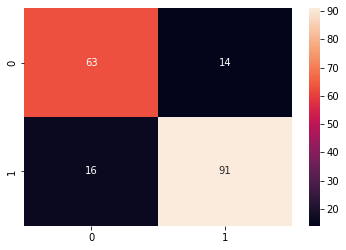

In [19]:
print(y_hat)
print(np.array(y_test))

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])

/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1]
[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]
0.16304347826086957
{'accuracy': 0.8369565217391305, 'precision': 0.8369565217391305, 'recall': 0.8369565217391305, 'f1_score': 0.8369565217391305}


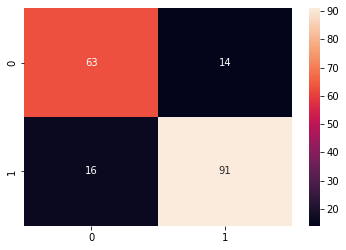

In [18]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [13]:
# Please save scores like the example below
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [14]:
#x is everything but heart disease
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
#y is heart disease
y = heart_df['HeartDisease']
# splits dataset; 80 percent train: 20 percent test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
#scales down the x values
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier = LogisticRegression(random_state=0)
#Fits dataset
classifier.fit(x_train, y_train)
#gets predicted values
y_pred= classifier.predict(x_test)
#compares predictions to actual values
cm= confusion_matrix(y_pred, y_test)
print(cm)
"""total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)"""
"""x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()""" 

[[60 11]
 [17 96]]


"x_set, y_set = x_train, y_train  \nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  \nnp.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  \nplt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  \nalpha = 0.75, cmap = ListedColormap(('purple','green' )))  \nplt.xlim(x1.min(), x1.max())  \nplt.ylim(x2.min(), x2.max())  \nfor i, j in enumerate(np.unique(y_set)):  \n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  \n        c = ListedColormap(('purple', 'green'))(i), label = j)  \nplt.title('Logistic Regression (Training set)')  \nplt.xlabel('Age')  \nplt.ylabel('Estimated Salary')  \nplt.legend()  \nplt.show()"

(734, 11)


2022-08-03 17:52:41.982728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 17:52:41.982784: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 17:52:41.982816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (754e23c69b95): /proc/driver/nvidia/version does not exist
2022-08-03 17:52:41.983140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 3ms/step


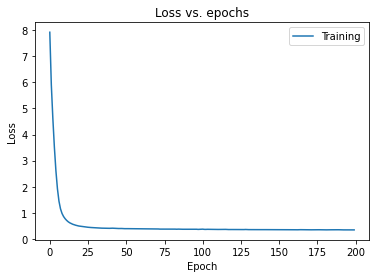

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]


1/6 [====>.........................] - ETA: 1s - loss: 0.3548 - accuracy: 0.9062

6/6 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8641


In [15]:
import copy
print(x_train.shape)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
CNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,1)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    tf.keras.layers.Dense(10)
])
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_history = CNN.fit(x_train, y_train, epochs=200, verbose = False)
prediction = CNN.predict(x_test)
y_hat = []
for i in range(0,len(prediction)):
    prediction[i] = np.argmax(prediction[i])
for i in range(0,len(prediction)):
    y_hat.append(int(prediction[i][0]))
plt.plot(CNN_history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
print(y_hat)
print(np.array(y_test))
test_loss, test_acc = CNN.evaluate(x_test,  y_test)

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_3 (Dense)             (None, 145)               1740      


 dense_4 (Dense)             (None, 120)               17520     


 dense_5 (Dense)             (None, 70)                8470      


 dense_6 (Dense)             (None, 50)                3550      


 dense_7 (Dense)             (None, 1)                 51        


Total params: 31,331


Trainable params: 31,331


Non-trainable params: 0


_________________________________________________________________


Epoch 1/25


 1/10 [==>...........................] - ETA: 7s - loss: 8.0765 - accuracy: 0.4182

10/10 [==============================] - 1s 33ms/step - loss: 7.7070 - accuracy: 0.6238 - val_loss: 7.2089 - val_accuracy: 0.8100


Epoch 2/25


 1/10 [==>...........................] - ETA: 0s - loss: 7.2072 - accuracy: 0.8182

10/10 [==============================] - 0s 9ms/step - loss: 6.8567 - accuracy: 0.8499 - val_loss: 6.3926 - val_accuracy: 0.8054


Epoch 3/25


 1/10 [==>...........................] - ETA: 0s - loss: 6.3680 - accuracy: 0.8727

10/10 [==============================] - 0s 8ms/step - loss: 6.0518 - accuracy: 0.8655 - val_loss: 5.6347 - val_accuracy: 0.8145


Epoch 4/25


 1/10 [==>...........................] - ETA: 0s - loss: 5.5682 - accuracy: 0.9091

10/10 [==============================] - 0s 10ms/step - loss: 5.3165 - accuracy: 0.8635 - val_loss: 4.9711 - val_accuracy: 0.8371


Epoch 5/25


 1/10 [==>...........................] - ETA: 0s - loss: 4.8502 - accuracy: 0.9273

10/10 [==============================] - 0s 8ms/step - loss: 4.6772 - accuracy: 0.8655 - val_loss: 4.3740 - val_accuracy: 0.8507


Epoch 6/25


 1/10 [==>...........................] - ETA: 0s - loss: 4.4207 - accuracy: 0.8364

10/10 [==============================] - 0s 9ms/step - loss: 4.0880 - accuracy: 0.8674 - val_loss: 3.8180 - val_accuracy: 0.8507


Epoch 7/25


 1/10 [==>...........................] - ETA: 0s - loss: 3.6731 - accuracy: 0.9273

10/10 [==============================] - 0s 9ms/step - loss: 3.5457 - accuracy: 0.8850 - val_loss: 3.3093 - val_accuracy: 0.8552


Epoch 8/25


 1/10 [==>...........................] - ETA: 0s - loss: 3.3142 - accuracy: 0.8545

10/10 [==============================] - 0s 8ms/step - loss: 3.0574 - accuracy: 0.8869 - val_loss: 2.8497 - val_accuracy: 0.8552


Epoch 9/25


 1/10 [==>...........................] - ETA: 0s - loss: 2.8497 - accuracy: 0.8364

10/10 [==============================] - 0s 10ms/step - loss: 2.6132 - accuracy: 0.8850 - val_loss: 2.4385 - val_accuracy: 0.8597


Epoch 10/25


 1/10 [==>...........................] - ETA: 0s - loss: 2.5474 - accuracy: 0.7273

10/10 [==============================] - 0s 10ms/step - loss: 2.2181 - accuracy: 0.8811 - val_loss: 2.0738 - val_accuracy: 0.8643


Epoch 11/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.9340 - accuracy: 0.9091

10/10 [==============================] - 0s 9ms/step - loss: 1.8714 - accuracy: 0.8791 - val_loss: 1.7556 - val_accuracy: 0.8643


Epoch 12/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.7159 - accuracy: 0.8545

10/10 [==============================] - 0s 8ms/step - loss: 1.5682 - accuracy: 0.8791 - val_loss: 1.4843 - val_accuracy: 0.8597


Epoch 13/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.3300 - accuracy: 0.8909

10/10 [==============================] - 0s 16ms/step - loss: 1.3137 - accuracy: 0.8791 - val_loss: 1.2584 - val_accuracy: 0.8643


Epoch 14/25


 1/10 [==>...........................] - ETA: 0s - loss: 1.2091 - accuracy: 0.8545

 9/10 [==========================>...] - ETA: 0s - loss: 1.1143 - accuracy: 0.8848

10/10 [==============================] - 0s 21ms/step - loss: 1.1098 - accuracy: 0.8830 - val_loss: 1.0781 - val_accuracy: 0.8643


Epoch 15/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.9329 - accuracy: 0.9091

 7/10 [====================>.........] - ETA: 0s - loss: 0.9559 - accuracy: 0.8883

10/10 [==============================] - 0s 18ms/step - loss: 0.9399 - accuracy: 0.8830 - val_loss: 0.9420 - val_accuracy: 0.8643


Epoch 16/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.8468 - accuracy: 0.8909

10/10 [==============================] - 0s 10ms/step - loss: 0.8186 - accuracy: 0.8811 - val_loss: 0.8443 - val_accuracy: 0.8552


Epoch 17/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.7601 - accuracy: 0.8727

10/10 [==============================] - 0s 10ms/step - loss: 0.7303 - accuracy: 0.8811 - val_loss: 0.7691 - val_accuracy: 0.8643


Epoch 18/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.7268 - accuracy: 0.8545

10/10 [==============================] - 0s 10ms/step - loss: 0.6598 - accuracy: 0.8869 - val_loss: 0.7156 - val_accuracy: 0.8552


Epoch 19/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.8909

10/10 [==============================] - 0s 9ms/step - loss: 0.6106 - accuracy: 0.8889 - val_loss: 0.6768 - val_accuracy: 0.8597


Epoch 20/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.8545

10/10 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.8811

10/10 [==============================] - 0s 12ms/step - loss: 0.5766 - accuracy: 0.8811 - val_loss: 0.6473 - val_accuracy: 0.8552


Epoch 21/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.9455

10/10 [==============================] - 0s 10ms/step - loss: 0.5455 - accuracy: 0.8889 - val_loss: 0.6232 - val_accuracy: 0.8552


Epoch 22/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.6086 - accuracy: 0.8364

10/10 [==============================] - 0s 10ms/step - loss: 0.5218 - accuracy: 0.8928 - val_loss: 0.6065 - val_accuracy: 0.8552


Epoch 23/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5125 - accuracy: 0.9091

 8/10 [=======================>......] - ETA: 0s - loss: 0.4909 - accuracy: 0.9000

10/10 [==============================] - 0s 18ms/step - loss: 0.5069 - accuracy: 0.8928 - val_loss: 0.5951 - val_accuracy: 0.8552


Epoch 24/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.9273

10/10 [==============================] - 0s 11ms/step - loss: 0.4955 - accuracy: 0.8889 - val_loss: 0.5863 - val_accuracy: 0.8597


Epoch 25/25


 1/10 [==>...........................] - ETA: 0s - loss: 0.5175 - accuracy: 0.8909

 9/10 [==========================>...] - ETA: 0s - loss: 0.4891 - accuracy: 0.8828

10/10 [==============================] - 0s 13ms/step - loss: 0.4847 - accuracy: 0.8869 - val_loss: 0.5792 - val_accuracy: 0.8597


1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 2ms/step


AttributeError: 'function' object has no attribute 'to_html'

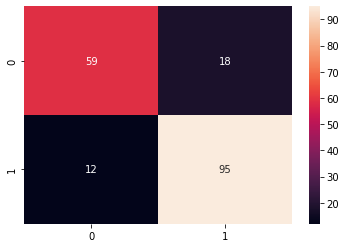

In [16]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
CNN2 = tf.keras.Sequential()
CNN2.add(tf.keras.layers.Dense(units=145,activation="relu",input_dim=11))
CNN2.add(tf.keras.layers.Dense(units=120,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=70,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=50,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1(0.003)))
CNN2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
CNN2.summary()
CNN2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
CNN2_his=CNN2.fit(x_train,y_train,validation_split=0.30, batch_size=55,epochs=25)
y_pred=CNN2.predict(x_test)
y_pred = (y_pred > 0.5)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
confusion_matrix.to_html('visualizations/cnn_confusion_matrx.html')
test_loss, test_acc = CNN2.evaluate(x_test,  y_test)

A neural network works through different layers. There is 1 input layer, 1 output layer, and a custom amount of hidden layers. The different nodes in the hidden layers are supposed to simulate how brains work. Basically, each node is a combination of the inputs in some way. My neural network also works with a validation split, which are a part of the training split. They make sure that the model is moving in the right direction when training. This neural network has 3 hidden layers with a 0.88 accuracy rating.



In [108]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc, prec, recall, f1)
scores['CNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['CNN'])

0.8804347826086957 0.8818181818181818 0.9150943396226415 0.8981481481481483
{'accuracy': 0.8804347826086957, 'precision': 0.8818181818181818, 'recall': 0.9150943396226415, 'f1_score': 0.8981481481481483}


In [14]:
tree_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 21)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=21)

In [15]:
y_hat = tree_model.predict(x_test)
y_hat

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [16]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.14130434782608695


0.8586956521739131 0.8611111111111112 0.8942307692307693 0.8773584905660378
{'accuracy': 0.8586956521739131, 'precision': 0.8611111111111112, 'recall': 0.8942307692307693, 'f1_score': 0.8773584905660378}


{'accuracy': 0.8369565217391305, 'precision': 0.8829787234042553, 'recall': 0.8137254901960784, 'f1_score': 0.846938775510204}


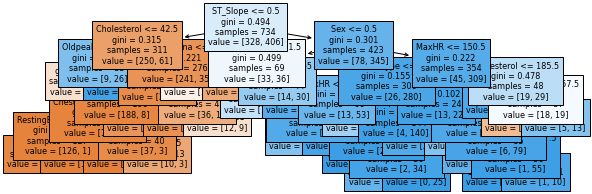

In [17]:
tree_model = tree.DecisionTreeClassifier(max_depth = 54, min_samples_split = 33, min_samples_leaf= 11)
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(10,3))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=8)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC'])




{'accuracy': 0.842391304347826, 'precision': 0.8613861386138614, 'recall': 0.8529411764705882, 'f1_score': 0.8571428571428572}


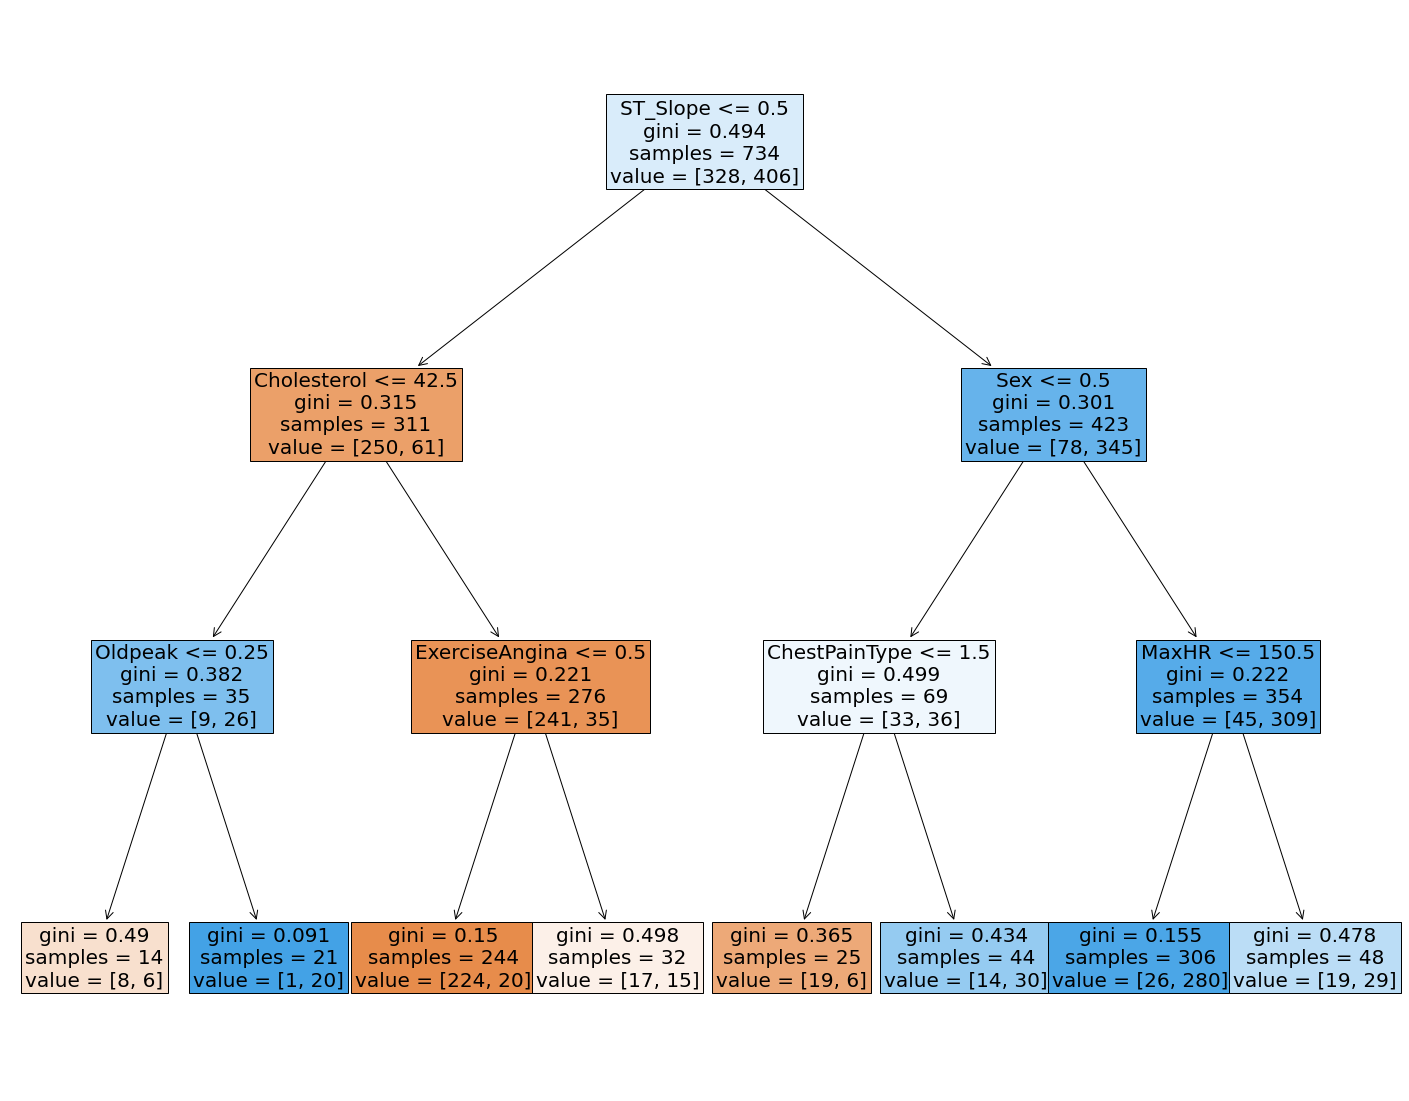

In [18]:
tree_model = tree.DecisionTreeClassifier(max_depth = 3)
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=20)
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['DTC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['DTC'])




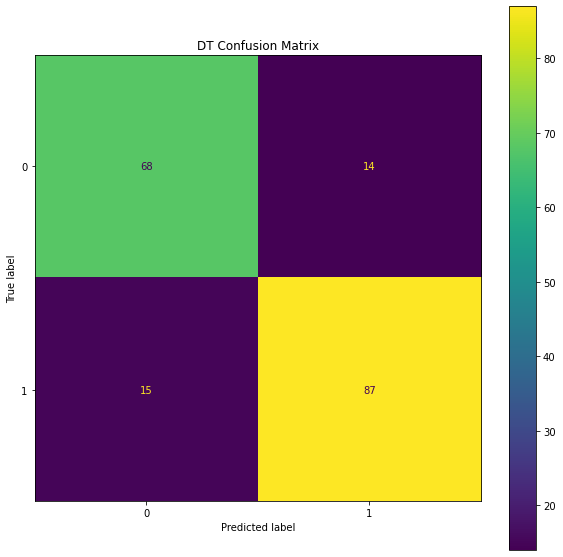

In [23]:
title = "DT Confusion Matrix"
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_hat, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(ax=ax)
disp.ax_.set_title(title)
fig.savefig("confusion_matrices/dt.jpg")
#sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A decision tree classifier model classifies data as it passes through the nodes in the tree and uses the gini index to determine where to split. In order to optimize the decision tree, I used cv and randomized cv to find the best hyperparameters. It has a max depth of 54, minimum samples split of 33, minimum samples leaf of 11, and accuracy of 0.84. 


In [123]:
param_grid = {'max_depth': range(1,160), 'min_samples_split': range(2, 160), 'min_samples_leaf': range(1, 160)}
gs = RandomizedSearchCV(DecisionTreeClassifier(),param_grid, n_iter = 10000)
gs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=10000,
                   param_distributions={'max_depth': range(1, 160),
                                        'min_samples_leaf': range(1, 160),
                                        'min_samples_split': range(2, 160)})

In [124]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=54, min_samples_leaf=11, min_samples_split=33)

In [125]:
gs.best_score_

0.8542260739912402

In [52]:
#Random Forest Model
rf_model = RFC(n_estimators=67, max_depth= 90)
rf_model.fit(x_train, y_train)
y_hat = rf_model.predict(x_test)

prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)



0.842391304347826 0.8691588785046729 0.9117647058823529 0.8899521531100477


In [53]:
y_pred = rf_model.predict(x_test)


In [54]:
total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.125


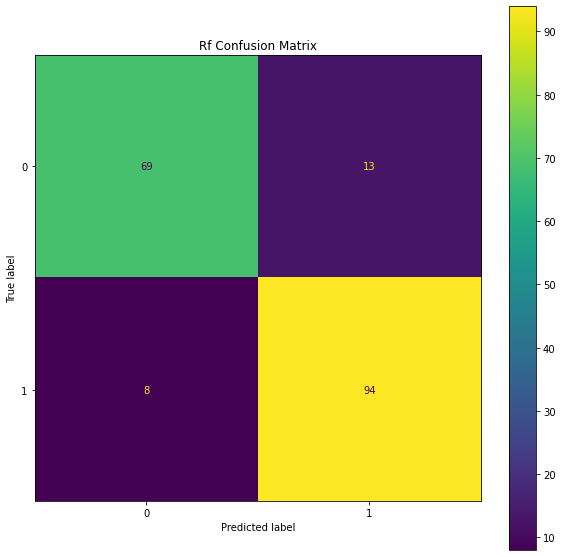

In [48]:
title = "Rf Confusion Matrix"
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(ax=ax)
disp.ax_.set_title(title)
fig.savefig("confusion_matrices/rf.jpg")

#sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

A random forest classifier is an ensemble of decision trees that work together to classify data. Each decision tree in the random forest individually classifies the data, and the outcome with the most votes becomes the final outcome of the model. I used randomized cv to find the best hyperparameters for the model. The max number of estimators is 67, the max depth is 90, and the model has an accuracy of 0.89, which is greater than an individual decision tree. 



In [176]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)
scores['RFC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['RFC'])

0.8913043478260869 0.9316239316239316 0.9008264462809917 0.9159663865546218
{'accuracy': 0.8913043478260869, 'precision': 0.9316239316239316, 'recall': 0.9008264462809917, 'f1_score': 0.9159663865546218}


In [0]:
param_grid = {'n_estimators': range(1, 101), 'max_depth': range(1, 101)}
gs = RandomizedSearchCV(RFC(),param_grid)
gs.fit(x_train, y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 101),
                                        'n_estimators': range(1, 101)})

In [179]:
gs.best_params_

{'n_estimators': 67, 'max_depth': 90}

In [180]:
gs.best_score_

0.8651383841207714